<a href="https://colab.research.google.com/github/nickymind/DOE-Econometria/blob/main/Nowcasting_PIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels --upgrade
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd

# 1. Carga y ajuste de Series


In [3]:
pd.set_option('display.float_format',  '{:,}'.format)

In [57]:
trx=pd.read_csv('https://raw.githubusercontent.com/nickymind/DOE-Econometria/main/Data%20trx%20v2.csv', sep=';', encoding='latin-1')

In [58]:
trx.head()

,Periodo,Año,Fecha,N_Mes,S_ATM,Q_ATM,S_CAJA,Q_CAJA,S_TC,Q_TC,S_TD,Q_TD,S_Transf,Q_Transf
0,202109,2021,1/9/21 00:00,9,"2,470,454,581.65","364,868.0","1,343,225,437.97","11,584.0","108,162,943.57",25117,"970,780,164.47","383,681.0","2,566,476,688.9","192,309.0"
1,202109,2021,2/9/21 00:00,9,"2,548,740,104.56","369,785.0","1,412,150,557.47","11,110.0","85,539,020.98",20831,"977,337,373.0","389,395.0","2,570,610,668.03","192,484.0"
2,202109,2021,3/9/21 00:00,9,"2,790,571,218.86","390,939.0","1,912,946,253.56","14,220.0","91,824,075.48",23344,"1,099,383,834.02","433,393.0","2,816,008,441.9","212,779.0"
3,202109,2021,4/9/21 00:00,9,NaN,NaN,NaN,NaN,"79,277,854.42",19693,"1,120,945,104.32","439,813.0",NaN,NaN
4,202109,2021,5/9/21 00:00,9,NaN,NaN,NaN,NaN,"40,059,232.11",11549,"540,123,107.94","253,641.0",NaN,NaN


In [54]:
#trx['Fecha'] = pd.to_datetime(trx.Fecha).dt.to_period('m')

In [5]:
emae=pd.read_csv('https://raw.githubusercontent.com/nickymind/DOE-Econometria/Ajustes/EMAEv2.csv', sep=',', encoding='latin-1')

In [15]:
emae.head()

,Periodo,Indice
0,202108,141.058025135032
1,202109,140.845981271007
2,202110,140.562729892158
3,202111,145.463587294665
4,202112,146.03073105734


In [6]:
trx.drop(trx.index[trx['Periodo'] == 202211], inplace=True)

In [7]:
trx.drop(trx.index[trx['Periodo'] == 202212], inplace=True)

In [8]:
trx.drop(trx.index[trx['Periodo'] == 202301], inplace=True)

In [9]:
emae.drop(emae.index[emae['Periodo'] == 202108], inplace=True)

In [10]:
trx_agrupmes=trx.groupby(['Periodo']).sum()

In [11]:
trx_agrupmes.head()

,Año,N_Mes,S_ATM,Q_ATM,S_CAJA,Q_CAJA,S_TC,Q_TC,S_TD,Q_TD,S_Transf,Q_Transf
Periodo,,,,,,,,,,,,
202109,60630,270,"58,789,743,679.19","8,916,269.0","33,535,452,807.72","280,631.0","13,916,704,537.6",3362919,"24,503,367,623.97","10,565,832.0","54,505,185,542.46","4,425,462.0"
202110,62651,310,"59,397,794,926.83","8,758,404.0","34,518,749,819.22","278,723.0","28,145,229,157.34",6147408,"28,134,615,010.62","11,950,886.0","54,245,880,146.11","3,747,904.0"
202111,60630,330,"68,553,238,783.200005","9,508,422.0","37,915,961,677.52","292,272.0","29,638,326,822.18",5640658,"28,124,349,814.32","11,593,239.0","57,215,729,678.06","3,922,719.0"
202112,62651,372,"88,879,461,348.04","10,931,282.0","51,635,687,934.84","376,705.0","30,148,240,607.22",5745105,"39,295,148,363.03","14,589,180.0","68,186,780,263.59","4,460,891.0"
202201,62682,31,"69,931,623,292.08","8,676,702.0","31,704,018,266.0","249,572.0","26,206,466,771.23",5037420,"32,017,977,035.78","12,190,170.0","60,336,773,062.16","3,812,772.0"


In [12]:
trx_agrupmes.reset_index(inplace=True)

In [ ]:
trx_agrupmes.info()

In [ ]:
emae.info()

In [23]:
assert set(emae.Periodo) == set(trx_agrupmes.Periodo), "periods in the datasets do not match"

In [13]:
trx_emae = pd.merge(trx_agrupmes, emae, on='Periodo', how='left')

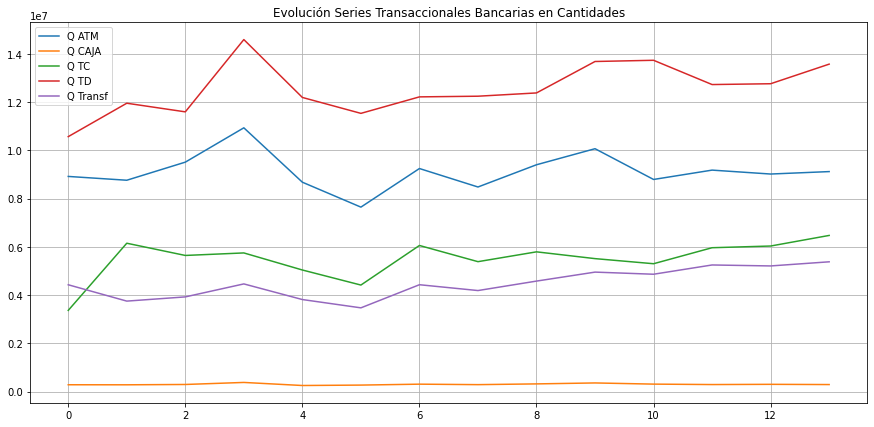

In [28]:
plt.figure(figsize=(15, 7))
plt.plot(trx_agrupmes.Q_ATM, label='Q ATM')
plt.plot(trx_agrupmes.Q_CAJA, label='Q CAJA')
plt.plot(trx_agrupmes.Q_TC, label='Q TC')
plt.plot(trx_agrupmes.Q_TD, label='Q TD')
plt.plot(trx_agrupmes.Q_Transf, label='Q Transf')
plt.title('Evolución Series Transaccionales Bancarias en Cantidades')
plt.grid(True)
plt.legend()
plt.show()

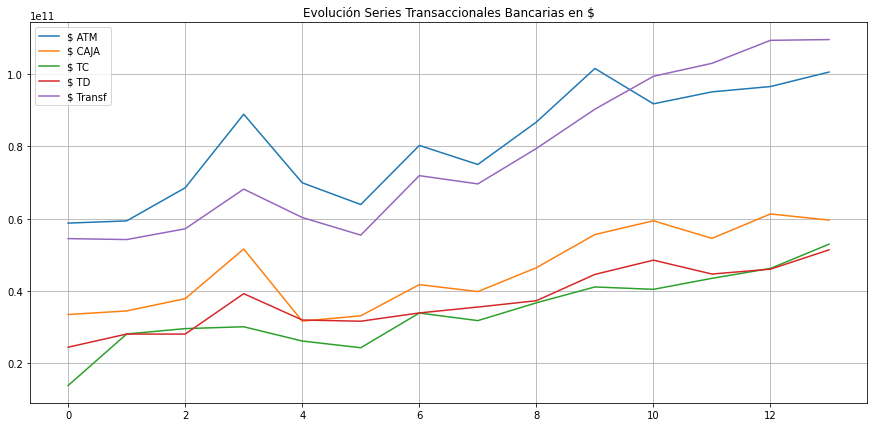

In [29]:
plt.figure(figsize=(15, 7))
plt.plot(trx_agrupmes.S_ATM, label='$ ATM')
plt.plot(trx_agrupmes.S_CAJA, label='$ CAJA')
plt.plot(trx_agrupmes.S_TC, label='$ TC')
plt.plot(trx_agrupmes.S_TD, label='$ TD')
plt.plot(trx_agrupmes.S_Transf, label='$ Transf')
plt.title('Evolución Series Transaccionales Bancarias en $')
plt.grid(True)
plt.legend()
plt.show()

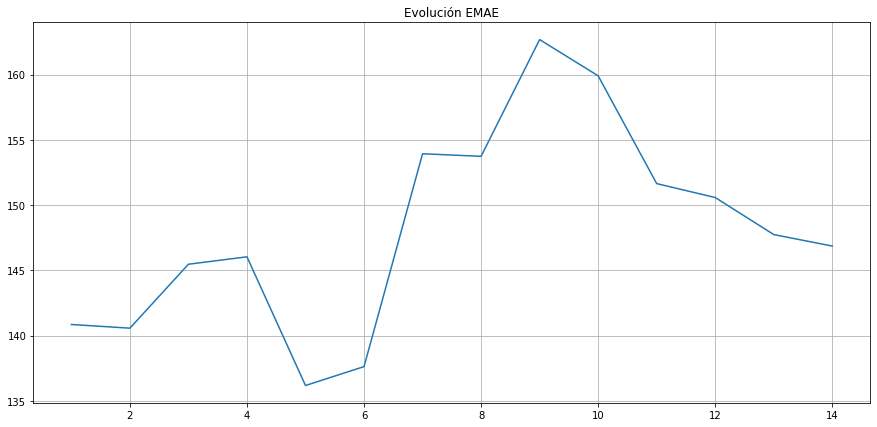

In [30]:
plt.figure(figsize=(15, 7))
plt.plot(emae.Indice)
plt.title('Evolución EMAE')
plt.grid(True)
plt.show()

<Figure size 1080x1440 with 0 Axes>

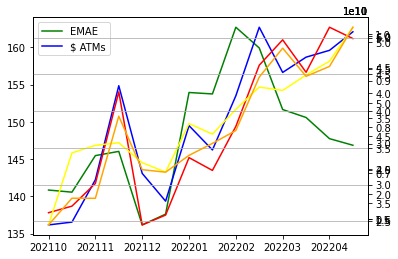

In [69]:
plt.figure(figsize=(15, 20))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 =ax1.twinx()
ax4 =ax1.twinx()
ax5 =ax1.twinx()
ax1.plot(trx_emae.Indice, label='EMAE', color='green')
ax2.plot(trx_emae.S_ATM, label='$ ATMs', color='blue')
ax3.plot(trx_emae.S_CAJA, label='$ CAJA', color='red')
ax4.plot(trx_emae.S_TC, label='$ TC', color='yellow')
ax5.plot(trx_emae.S_TD, label='$ TD', color='orange')
plt.grid(True)
lines = ax1.get_lines() + ax2.get_lines()
ax1.set_xticklabels(trx_emae.Periodo)
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')
plt.show()

##  Dickey-Fuller Test

La teoria propone que un proceso estacionario tiene que tener todas sus raices >1.
Lo siguiente de la documentacion de DF me dice que el pvalue es el segundo resultado. Lo llamo con [1]


From:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

Returns:  
adf The test statistic.\
pvalue MacKinnon”s approximate p-value based on MacKinnon (1994, 2010).\
usedlag The number of lags used.\
nobsint The number of observations used for the ADF regression and calculation of the critical values. \
critical values  Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010). \
icbest The maximized information criterion if autolag is not None.\


In [35]:
# Como devuelve varios estadisticos, con 1 nos referimos al segundo, esto es, el p-value. Está debajo del umbral así que rechazamos Hipótesis Nula.
sm.tsa.stattools.adfuller(trx_emae.Indice)[1]


8.413394649025133e-14

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


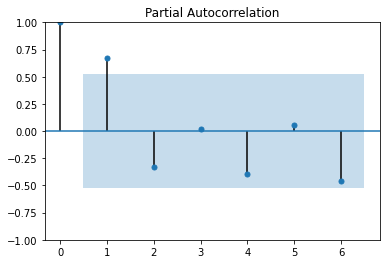

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(trx_emae.Indice, lags=6, alpha=0.05)
plt.show()

In [20]:
# AR(1)
mod = AutoReg(trx_emae.Indice, 1, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Indice   No. Observations:                   14
Model:                     AutoReg(1)   Log Likelihood                 -41.318
Method:               Conditional MLE   S.D. of innovations              5.809
Date:                Tue, 31 Jan 2023   AIC                             88.635
Time:                        01:47:05   BIC                             90.330
Sample:                             1   HQIC                            88.287
                                   14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.1885     30.314      1.854      0.064      -3.225     115.602
Indice.L1      0.6240      0.204      3.056      0.002       0.224       1.024
                                    Roots           

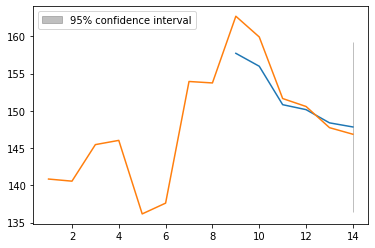

In [107]:
res.plot_predict(9,14)
plt.plot(emae.Indice)

In [111]:
sm.tsa.stattools.adfuller(res.resid)[1]
# se rechaza el unit root (i.e. sigue siendo estacionaria)

2.3443852109564136e-11

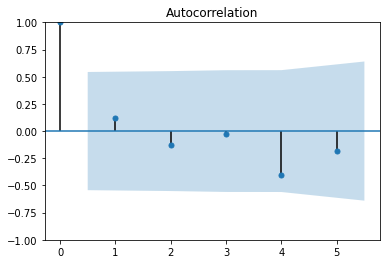

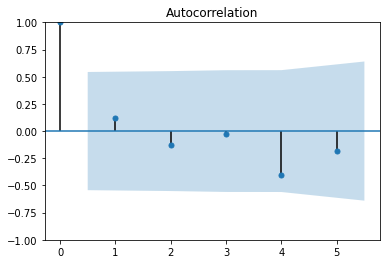

In [118]:
smt.graphics.plot_acf(res.resid, lags=5)
# No hay autocorrelación en los residuos

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


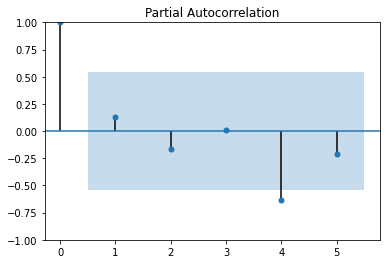

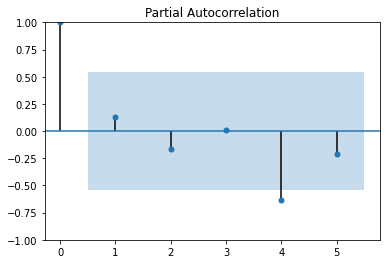

In [119]:
smt.graphics.plot_pacf(res.resid, lags=5, alpha=0.05)
# Tampoco autocorrelación parcial

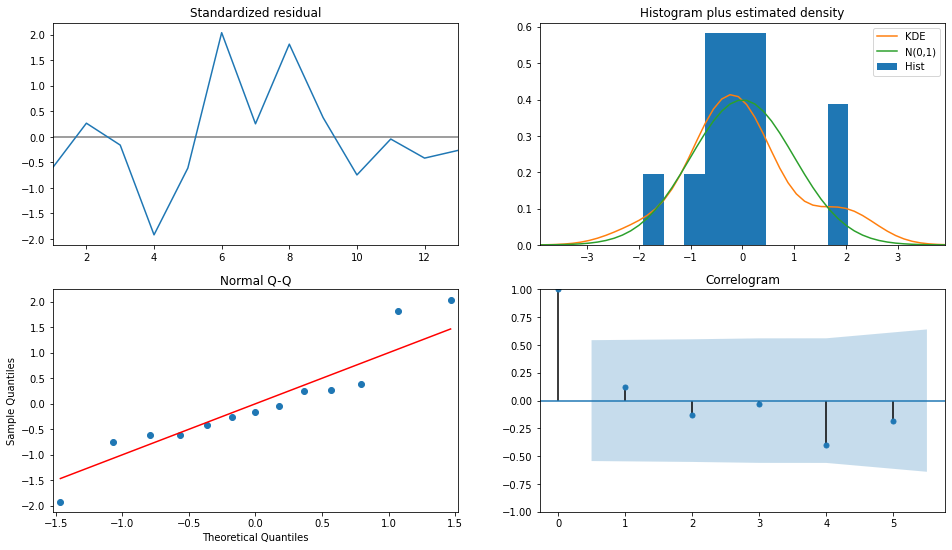

In [121]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=5)

In [108]:
# AR(1)
varlag = pd.DataFrame({"c":trx_emae.S_TC})
varlag = trx_emae.S_TD.shift(0)
varlag = trx_emae.S_TD.iloc[0:]
mod2 = AutoReg(trx_emae.Indice[0:], 1, exog=varlag, old_names=False)
res2 = mod2.fit()
print(res2.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Indice   No. Observations:                   14
Model:                   AutoReg-X(1)   Log Likelihood                 -41.297
Method:               Conditional MLE   S.D. of innovations              5.799
Date:                Tue, 31 Jan 2023   AIC                             90.594
Time:                        03:42:29   BIC                             92.854
Sample:                             1   HQIC                            90.130
                                   14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9451     34.206      1.548      0.122     -14.098     119.988
Indice.L1      0.6611      0.273      2.418      0.016       0.125       1.197
S_TD       -5.837e-11   2.87e-10     -0.203      0.8

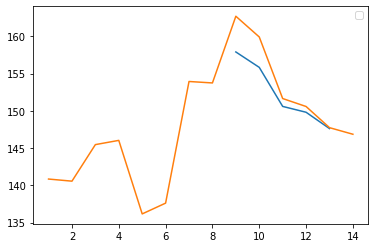

In [109]:
#res.plot_predict(6,13)
res2.plot_predict(9,13, exog=varlag)
plt.plot(emae.Indice)

In [110]:
# AR(1) con Ciclo y Tendencia (A modelar con una serie más extensa)
mod3 = ar_select_order(trx_emae.Indice,maxlag=2, trend='ct',seasonal=True, period=12)
#mod3.ar_lags
#res3 = mod3.model.fit()
#print(mod3.summary())

ValueError: ignored